In [1]:
import torch
use_cuda = torch.cuda.is_available()
device = 'cuda' if use_cuda else 'cpu'
print('사용 가능 디바이스: ', device)

# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# import torch.nn.init

# from torchvision import transforms

# import random

사용 가능 디바이스:  cpu


In [2]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to C:\Users\Hyosung/.cache\torch\hub\v0.10.0.zip
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to C:\Users\Hyosung/.cache\torch\hub\checkpoints\googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [12]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [16]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename, )
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to(device)
    model.to(device)

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([ 3.5607e-02, -2.2878e-01, -3.2326e-01,  5.5473e-02,  1.1363e-01,
        -2.8251e-01,  6.1544e-01,  6.0954e-02,  9.4566e-01, -1.4981e+00,
        -5.5102e-01, -3.6587e-02, -1.2635e+00, -3.1757e-02,  5.3338e-01,
         1.8749e-01,  4.9309e-01, -2.8286e-01, -2.7196e-01, -2.6181e-01,
        -3.3155e-01, -7.5720e-02,  6.7103e-02, -5.7090e-01, -5.3176e-01,
        -4.9966e-02,  7.2163e-01,  1.1626e+00,  5.1519e-01,  1.3022e+00,
         6.9073e-01,  5.5678e-01,  1.3274e-01, -7.1238e-01, -5.0567e-01,
        -2.4467e-01, -5.9905e-01,  1.9404e-01, -3.2087e-01,  6.1736e-01,
         2.9624e-01, -2.4294e-01,  1.8518e-01, -4.5889e-01,  1.5296e-01,
        -6.8361e-01,  9.9018e-01,  6.1654e-01, -1.2935e+00, -4.6649e-01,
        -7.1416e-02, -3.3987e-04,  3.7411e-01,  1.8117e-01,  8.5821e-01,
         1.0058e+00, -3.0185e-01,  1.9626e-02,  7.9074e-02,  8.1202e-01,
         7.7451e-01, -7.0558e-01, -2.2717e-01, -2.5871e-01,  1.5508e-01,
        -4.5723e-01,  7.8180e-01,  1.4157e-01,  1.0

In [17]:
# Download ImageNet labels
import wget
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
wget.download(url)

100% [..............................................................................] 10472 / 10472

'imagenet_classes (2).txt'

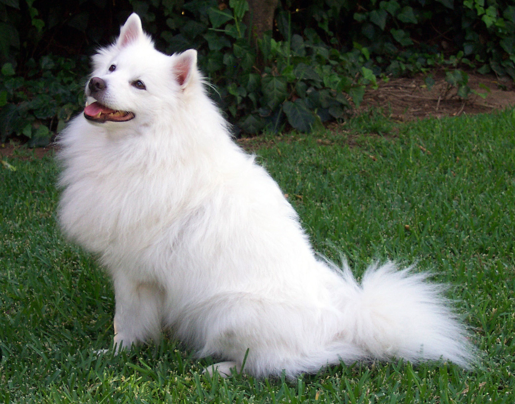

In [24]:
img_resize = input_image.resize((int(input_image.width / 3), int(input_image.height / 3)))

img_resize

In [25]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 10)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Samoyed 0.9378381967544556
Pomeranian 0.00828345213085413
Great Pyrenees 0.005603073630481958
Arctic fox 0.005527772940695286
white wolf 0.004741043783724308
West Highland white terrier 0.0021470931824296713
Eskimo dog 0.002104513579979539
keeshond 0.001540187862701714
kuvasz 0.0014846978010609746
chow 0.0013757523847743869
